# The Best Neighborhood in Pittsburgh

CMPINF 0010, Group 6 “Sherlock and the Holmes” – Irwin Jiang (irj11@pitt.edu), Jason Xie (jxx2@pitt.edu), William Danielson (wcd19@pitt.edu)

An examination of three metrics find the “best” neighborhood in Pittsburgh. The metrics we use are number of arrests, number of fires, and number of vehicles over the speed limit. See the Final Notebook file for our report or see the separate notebooks for detailed information on each metric. The datasets that were used are, for each metric respectively, [here](https://data.wprdc.org/dataset/arrest-data), [here](https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh), and [here](https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh).

Initially, we considered alternative datasets included an area’s air quality and amount of parks in an area. Due to certain circumstances, we decided against using those pieces of data. We decided that the neighborhood needed to be safest and had the least traffic congestion. To measure safety and traffic congestion, we used the Pittsburgh Police Arrest, Fire Incidents in the City of Pittsburgh, and City of Pittsburgh Traffic Count datasets. Neighborhoods with the least number of arrests and fire incidents would be deemed the safest. Neighborhoods with the least amount of traffic indicate less congestion. The best neighborhood would be the safest and have the least amount of congestion.

## Metric 1 – Arrests

In [1]:
# Libraries needed
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import seaborn as sb

In [2]:
# load csv file with index column as a date
data = pd.read_csv("Datasets/Arrests.csv",
                           index_col="ARRESTTIME", 
                           parse_dates=True)

Lets take a look at the information contained in this data

In [3]:
data.head(5)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
ARRESTTIME,,,,,,,,,,,,,,,,
2016-08-24 12:20:00,1,1975272,16158872,42.0,F,B,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
2016-08-03 14:55:00,2,1974456,16144120,31.0,M,W,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2016-08-03 16:45:00,3,1974466,16144165,63.0,F,B,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
2016-08-05 02:36:00,4,1974550,16145257,25.0,F,W,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
2016-08-06 02:00:00,5,1974596,16145962,25.0,M,B,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


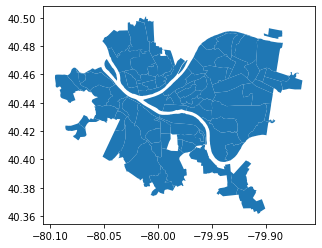

In [4]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

Taking a peek at the top 10 neighborhoods with the most arrest

In [5]:
num_arrest = data['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=False).rename_axis('neighborhood').reset_index(name='Number of Arrests')
num_arrest.head(10)

,neighborhood,Number of Arrests
0,Central Business District,4438
1,South Side Flats,3495
2,Carrick,2349
3,East Allegheny,2217
4,Homewood South,2089
5,Homewood North,1969
6,East Liberty,1887
7,Marshall-Shadeland,1516
8,Bluff,1501
9,Mount Washington,1433


In [6]:
arrest_map = neighborhoods.merge(num_arrest, how='left', left_on='hood', right_on='neighborhood')

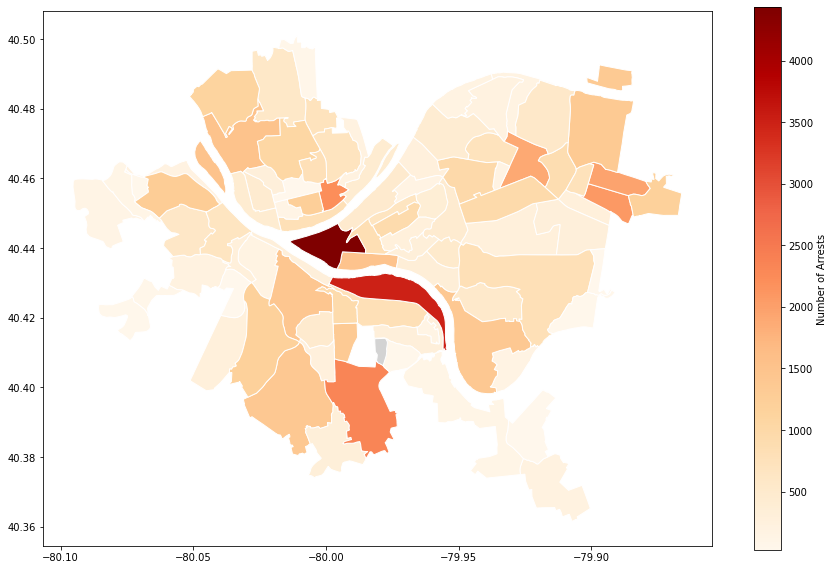

In [7]:
arrest_map.plot(column='Number of Arrests', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Arrests"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

With the map completed, it is time to see exactly which neighborhoods are the safest through a bar graph.

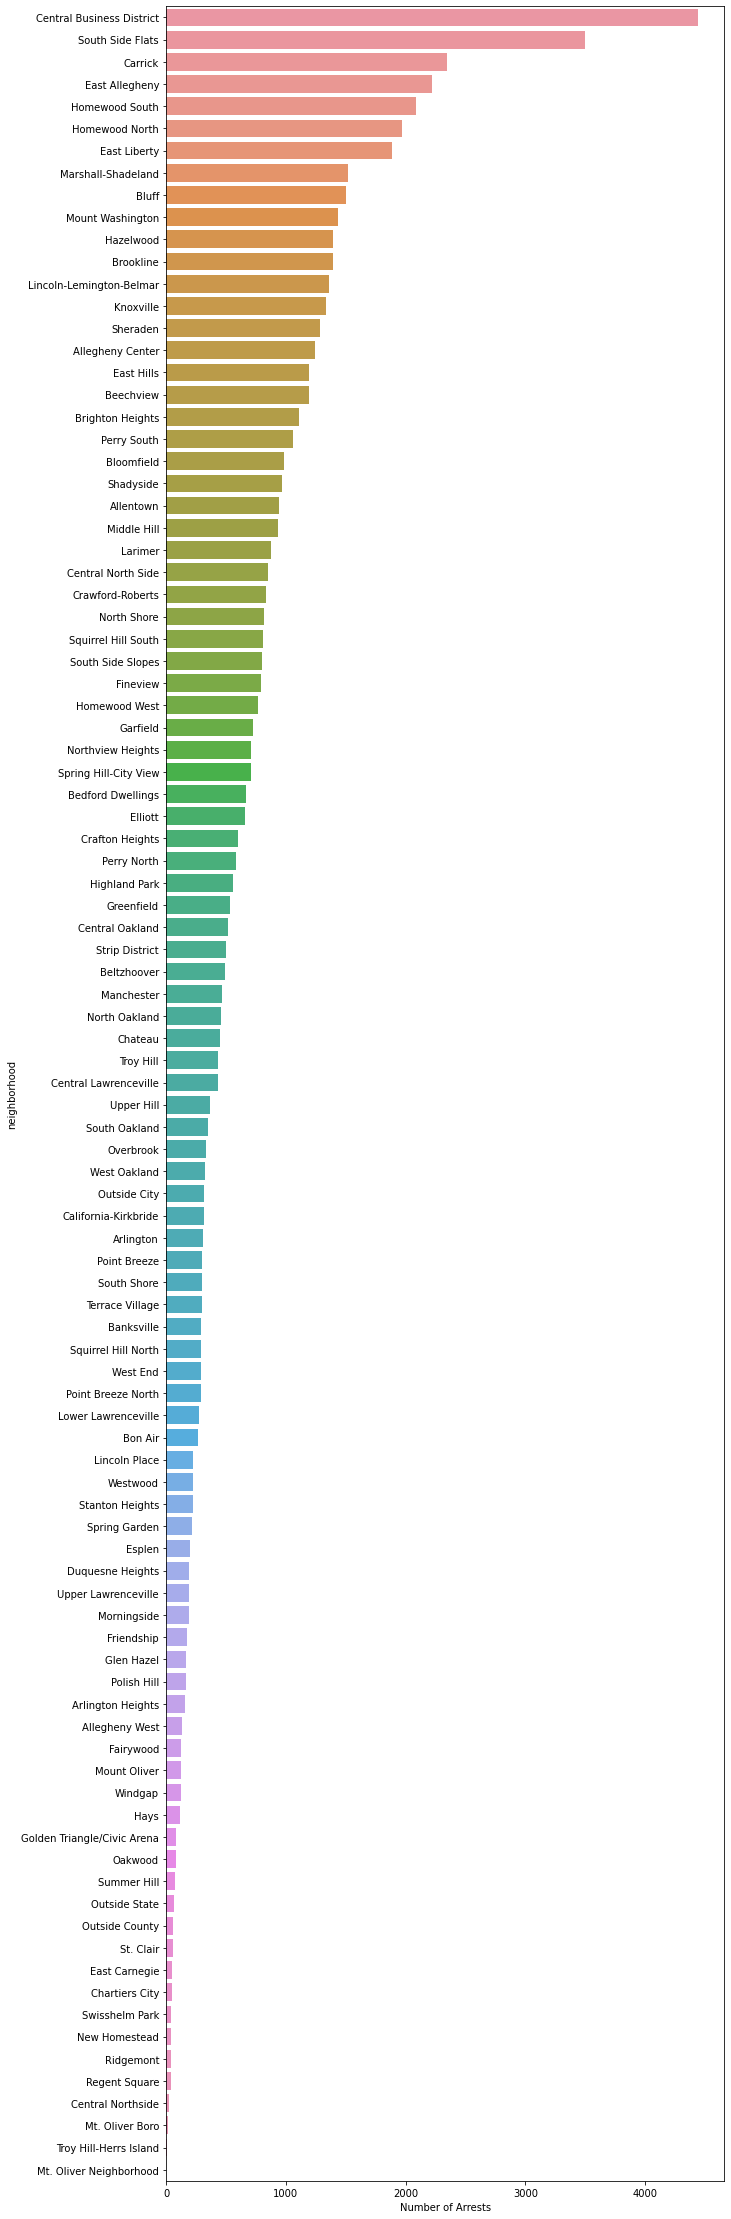

In [8]:
fig_dims = (10, 40)
fig, ax = plt.subplots(figsize=fig_dims)

ax = sb.barplot(x="Number of Arrests", # x axis label
                 y="neighborhood", # y axis label
                 ax=ax, # figsizes
                 data=num_arrest, # data we want to show
                 orient="h", # orientation of the graph
                 order=num_arrest.sort_values("Number of Arrests", ascending = False).neighborhood)

In [9]:
# Get the 5 neighborhoods with the least number of arrests
num_arrest.tail(5)

,neighborhood,Number of Arrests
93,Regent Square,37
94,Central Northside,23
95,Mt. Oliver Boro,18
96,Troy Hill-Herrs Island,6
97,Mt. Oliver Neighborhood,2


Based on the result presented in this notebook, **Mt. Oliver Neighborhood**, **Troy Hill-Herrs Island**, and **Mt. Oliver Boro** are the *top three* safest neighborhoods. While the arrest data articulates the safety of each neighborhood, the information should be taken with a grain of salt. The crime's severity was not measured in this notebook. Thus, the weight of each arrest may differ if severity is involved. Additionally, there could be unaccounted crimes in various neighborhoods. The data used in this notebook may not contain all crimes that have occurred in Pittsburgh. Finally, the data contains arrest that span a 9 year range. Thus, the number of arrests may not represent the how safe a neighborhood is in present day.

---

## Metric 2 – Fires

First, let’s get the data set up. Take a look at the raw data.

In [10]:
import pandas as pd
import geopandas
%matplotlib inline
fires = pd.read_csv('Datasets/Fire Incidents.csv')
fires.head(5)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


Now, let’s focus on the neighborhoods and clean up the data a bit. Here are the number of fires per neighborhood.

In [11]:
fires_by_hood = fires.groupby('neighborhood').size()
fires_by_hood.name = 'Fires by Neighborhood'
fires_by_hood.index.name = 'neighborhood'
fires_by_hood = fires_by_hood.drop('Mount Oliver Borough')
fires_by_hood

neighborhood
Allegheny Center        62
Allegheny West          43
Allentown              127
Arlington               51
Arlington Heights       13
                      ... 
Upper Lawrenceville     52
West End                23
West Oakland            62
Westwood                28
Windgap                 23
Name: Fires by Neighborhood, Length: 90, dtype: int64

Now, let’s gather the population data and divide the number of fires by the number of people in each neighborhood.

In [12]:
population = pd.read_csv('Datasets/Population by Neighborhood.csv').groupby('Neighborhood').sum()['2020_Total_Population']
population = population.rename(index={'Central Business District (Downtown)':'Central Business District'})
population = population.rename(index={'Spring Hill-City':'Spring Hill-City View'})
population = population.drop('Arlington - Arlington Heights (Combined)')
population = pd.concat([population, pd.Series({'Arlington': 1869, 'Arlington Heights': 244})])
population.name = 'Population by Neighborhood'
population.index.name = 'neighborhood'
population = population.sort_index()
population

neighborhood
Allegheny Center       1419
Allegheny West          540
Allentown              2305
Arlington              1869
Arlington Heights       244
                       ... 
Upper Lawrenceville    2394
West End                205
West Oakland           2534
Westwood               3332
Windgap                1344
Name: Population by Neighborhood, Length: 90, dtype: int64

Finally, let’s divide the two lists.

In [13]:
fires_per_people = fires_by_hood/population
fires_per_people.name = 'Fires per People by Neighborhood'
fires_per_people.index.name = 'neighborhood'
fires_per_people.sort_values()

neighborhood
Westwood               0.008403
Regent Square          0.009269
Morningside            0.009840
Squirrel Hill North    0.011365
Swisshelm Park         0.011949
                         ...   
Homewood West          0.096573
West End               0.112195
North Shore            0.215947
South Shore            0.793103
Chateau                2.157895
Name: Fires per People by Neighborhood, Length: 90, dtype: float64

We’ll remove two neighborhoods which are essentially unpopulated, and then visualize it.

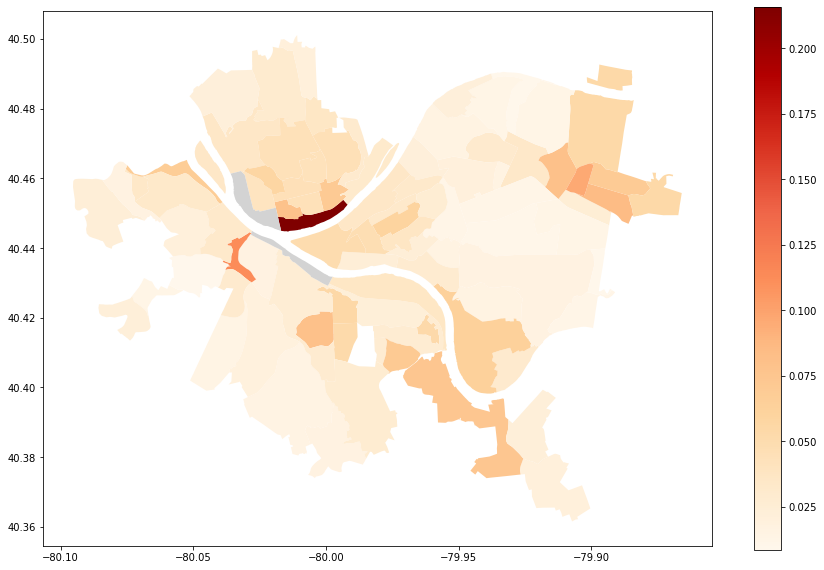

In [14]:
neighborhoods = geopandas.read_file('Neighborhoods/Neighborhoods_.shp')
fires_per_people = fires_per_people.drop('South Shore')
fires_per_people = fires_per_people.drop('Chateau')
fires_per_people_map = neighborhoods.merge(fires_per_people.to_frame(), how='left', left_on='hood', right_on='neighborhood')
fires_per_people_map.plot(column='Fires per People by Neighborhood', legend=True, figsize=(15,10), cmap='OrRd', missing_kwds={'color': 'lightgrey'})

How about a chart?

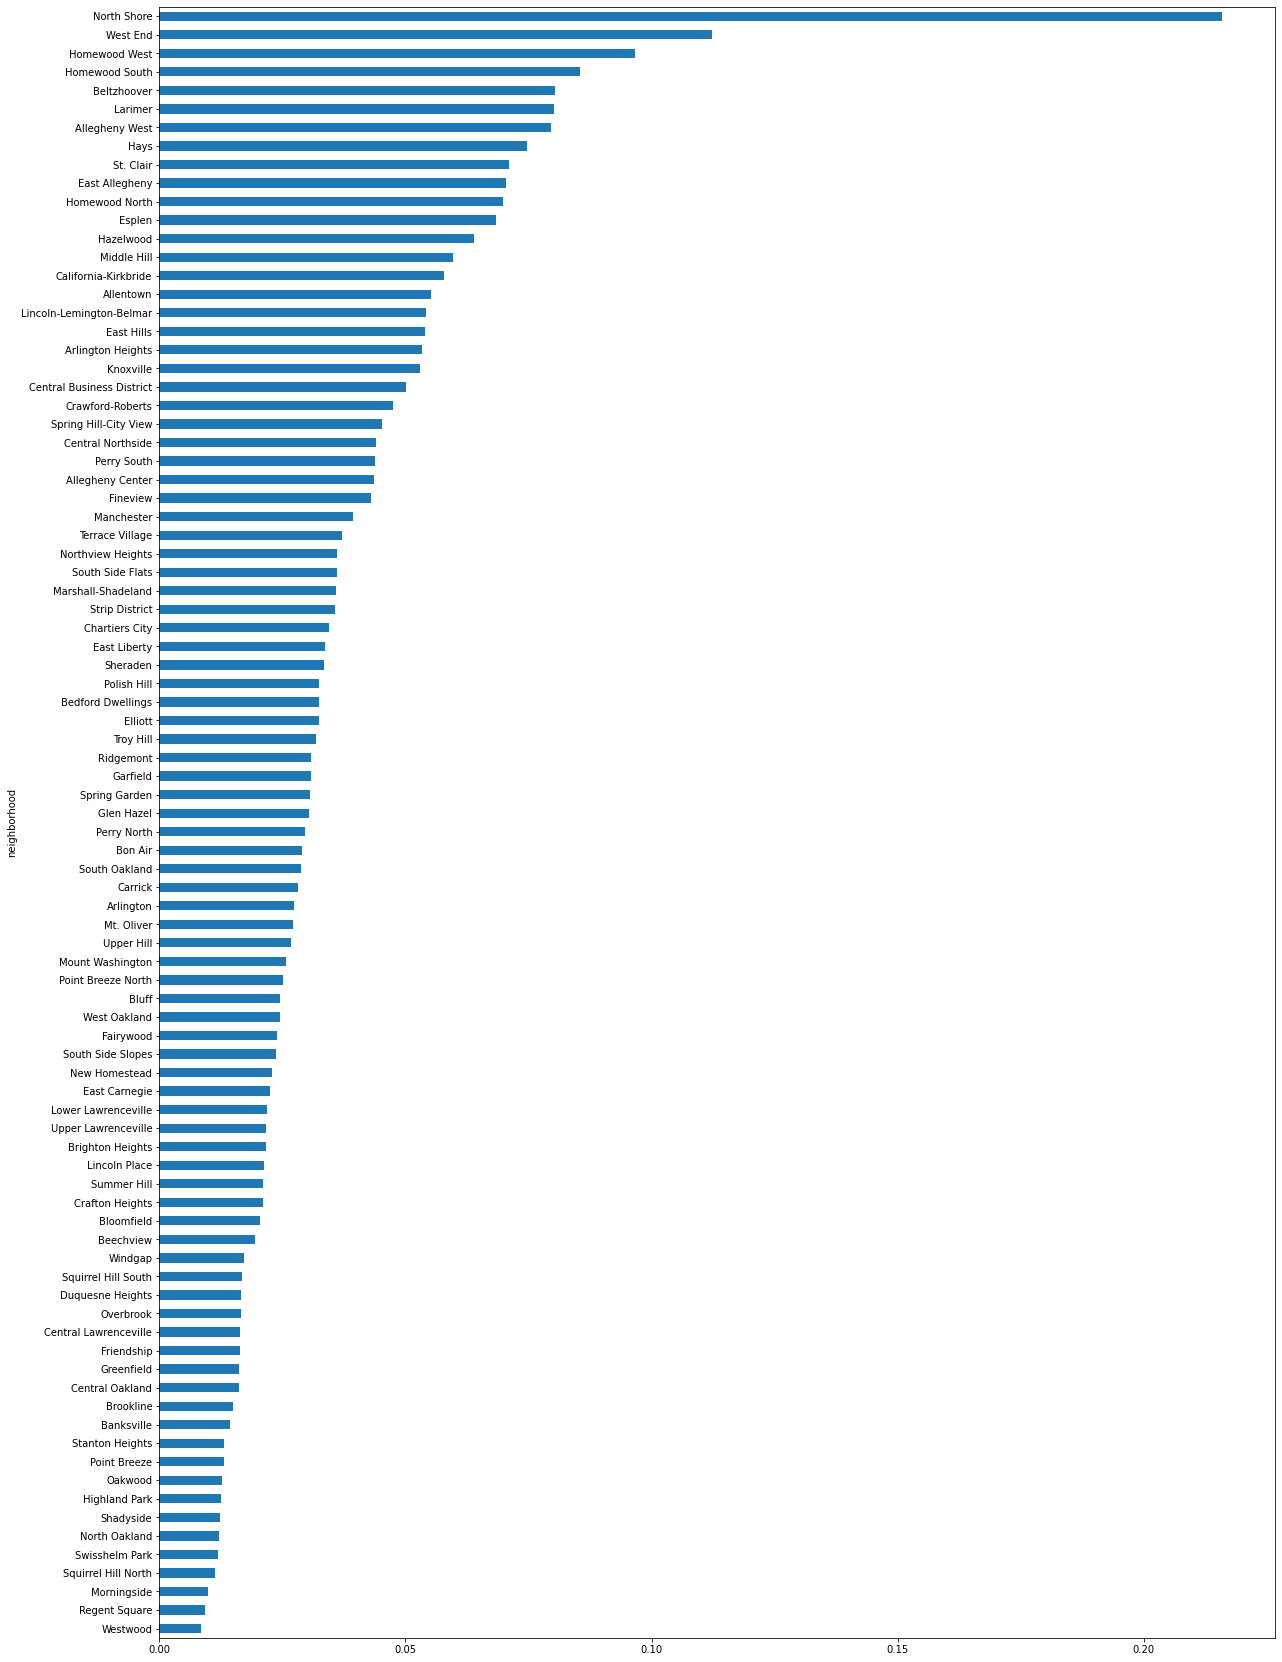

In [15]:
fires_per_people.sort_values().plot.barh(figsize=(20,30))

Thus, the neighborhoods with the least fires per capita are, in descending order:
- Swisshelm Park
- Squirrel Hill North
- Morningside
- Regent Square
- Westwood

## Metric 3 - Traffic



### Brief Summary
The traffic data in this notebook will be used to try and provide a rough estimate of some of the safest neighborhoods in Pittsburgh.<br>
This will be done by analyzing the amount of vehicles going over the speed limit in specific neighborhoods.<br>
The neighborhoods with the lowest % of vehicles driving over the speed limit should have some of the safest traffic conditions,<br>
not only making driving on them safer but walking as well.

### Neccessary Files and Libraries

In [16]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
pd.set_option('display.max_rows', 100)

Lets take a look at what some of the information in this data set looks like

In [17]:
traffic = pd.read_csv("Datasets/traffic.csv")
traffic.head()

,_id,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,2,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,3,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,4,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,5,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


As you can see, a lot of these rows contain missing information for certain fields. Not every entry recorded data for all the columns, <br>
Not every entry recorded data for all the columns, so this is why some of them are blank. In that case, lets filter down our list<br>
to every observation that recorded the percent of drivers over the speed limit. We also have a lot of columns with data that we<br>
don't really care about, so lets filter those out too.

In [18]:
over_limit = traffic["percent_over_limit"] > 0
traffic = traffic[over_limit]

traffic_filtered = traffic[['percent_over_limit', 'neighborhood']]
traffic_filtered = traffic_filtered.dropna()
traffic_filtered

,percent_over_limit,neighborhood
0,77.0,Polish Hill
2,28.0,Windgap
3,70.0,Squirrel Hill South
5,2.0,Central Northside
7,58.0,Polish Hill
...,...,...
407,13.0,Homewood South
408,17.0,Homewood South
410,29.0,Bloomfield
411,10.0,Bloomfield


Much better, now we have the recorded percent over limit and the neighborhood it was recorded in. <br>
Now we need to add up these percentages and average them over each neighborhood.<br>
Lets start by making a new dictionary for each neighborhood, and adding all of the relevant percents to it.<br>
After that, we can divide each percent value by the amount of times a neighborhood shows up in our data set,<br>
giving us the average percent of people driving over the speed limit in a neighborhood.<br>

In [19]:
hood_dict = dict()
num_rows = len(traffic_filtered)

for x in range (num_rows):
    hood = traffic_filtered.iat[x, 1]

    if hood not in hood_dict:
        hood_dict[hood]= [traffic_filtered.iat[x, 0]]
    else:
        hood_dict[hood].append(traffic_filtered.iat[x, 0])
        
for key in hood_dict:
    length = len(hood_dict[key])
    runningSum = 0
    
    for num in hood_dict[key]:
        runningSum = runningSum + num
        
    hood_dict[key] = round(runningSum / length, 2)
    
hood_dict

{'Polish Hill': 54.0,
 'Windgap': 33.67,
 'Squirrel Hill South': 55.88,
 'Central Northside': 29.0,
 'Greenfield': 68.67,
 'Bluff': 14.67,
 'Crafton Heights': 98.0,
 'Highland Park': 38.71,
 'North Shore': 83.5,
 'East Liberty': 65.62,
 'Mount Washington': 75.25,
 'Brookline': 61.17,
 'Shadyside': 44.07,
 'Squirrel Hill North': 48.57,
 'Bloomfield': 24.56,
 'Larimer': 48.78,
 'Friendship': 68.0,
 'Point Breeze': 64.5,
 'Regent Square': 86.0,
 'Central Lawrenceville': 18.5,
 'Knoxville': 25.0,
 'Central Oakland': 38.5,
 'Strip District': 60.33,
 'Beechview': 59.0,
 'Upper Hill': 36.5,
 'Stanton Heights': 81.33,
 'Manchester': 40.11,
 'South Side Slopes': 59.43,
 'Morningside': 42.12,
 'Perry North': 57.43,
 'North Oakland': 58.5,
 'East Hills': 62.0,
 'Duquesne Heights': 48.0,
 'Sheraden': 61.0,
 'Central Business District': 6.0,
 'St. Clair': 85.0,
 'Perry South': 25.67,
 'Carrick': 45.5,
 'Westwood': 59.5,
 'Allegheny Center': 65.0,
 'Elliott': 97.0,
 'East Allegheny': 38.0,
 'Overbro

Great, lets put this dictionary back into its own dataframe.

In [20]:
hoods_averaged = traffic_filtered.drop_duplicates('neighborhood')
num_rows = len(hoods_averaged)

for x in range (num_rows):
    hoods_averaged.iat[x, 0] = hood_dict[hoods_averaged.iat[x, 1]]
    
hoods_averaged = hoods_averaged.rename(columns={'percent_over_limit':'% Over speed limit'})
columns_titles = ["neighborhood","% Over speed limit"]
hoods_averaged = hoods_averaged.reindex(columns=columns_titles)
hoods_averaged

,neighborhood,% Over speed limit
0,Polish Hill,54.00
2,Windgap,33.67
3,Squirrel Hill South,55.88
5,Central Northside,29.00
11,Greenfield,68.67
13,Bluff,14.67
14,Crafton Heights,98.00
17,Highland Park,38.71
18,North Shore,83.50
19,East Liberty,65.62


Now lets go ahead and put this dataset on a map of Pittsburgh to better visualize it.

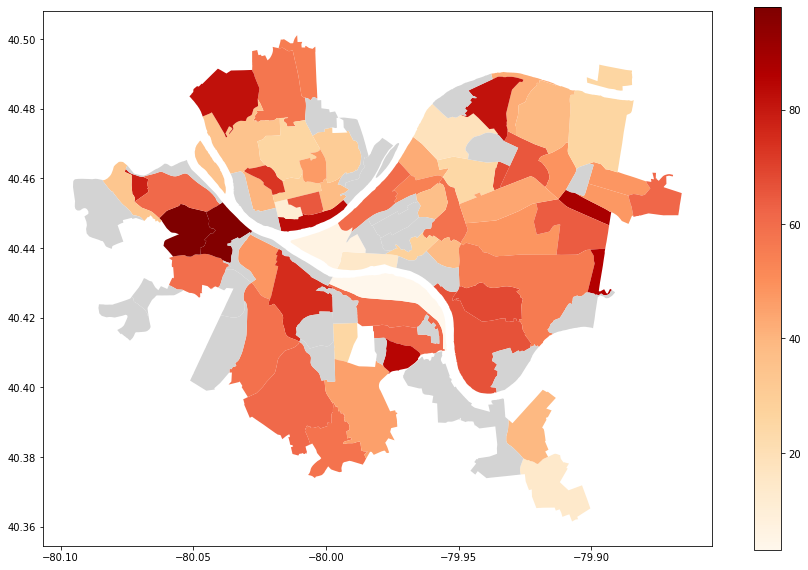

In [21]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
traffic_map = neighborhoods.merge(hoods_averaged, how='left', left_on='hood', right_on='neighborhood')
traffic_map.plot(column='% Over speed limit', legend=True, figsize=(15,10), cmap='OrRd', missing_kwds={'color': 'lightgrey'})

Lets also put these neighborhoods in a bar graph so we can compare them side by side.

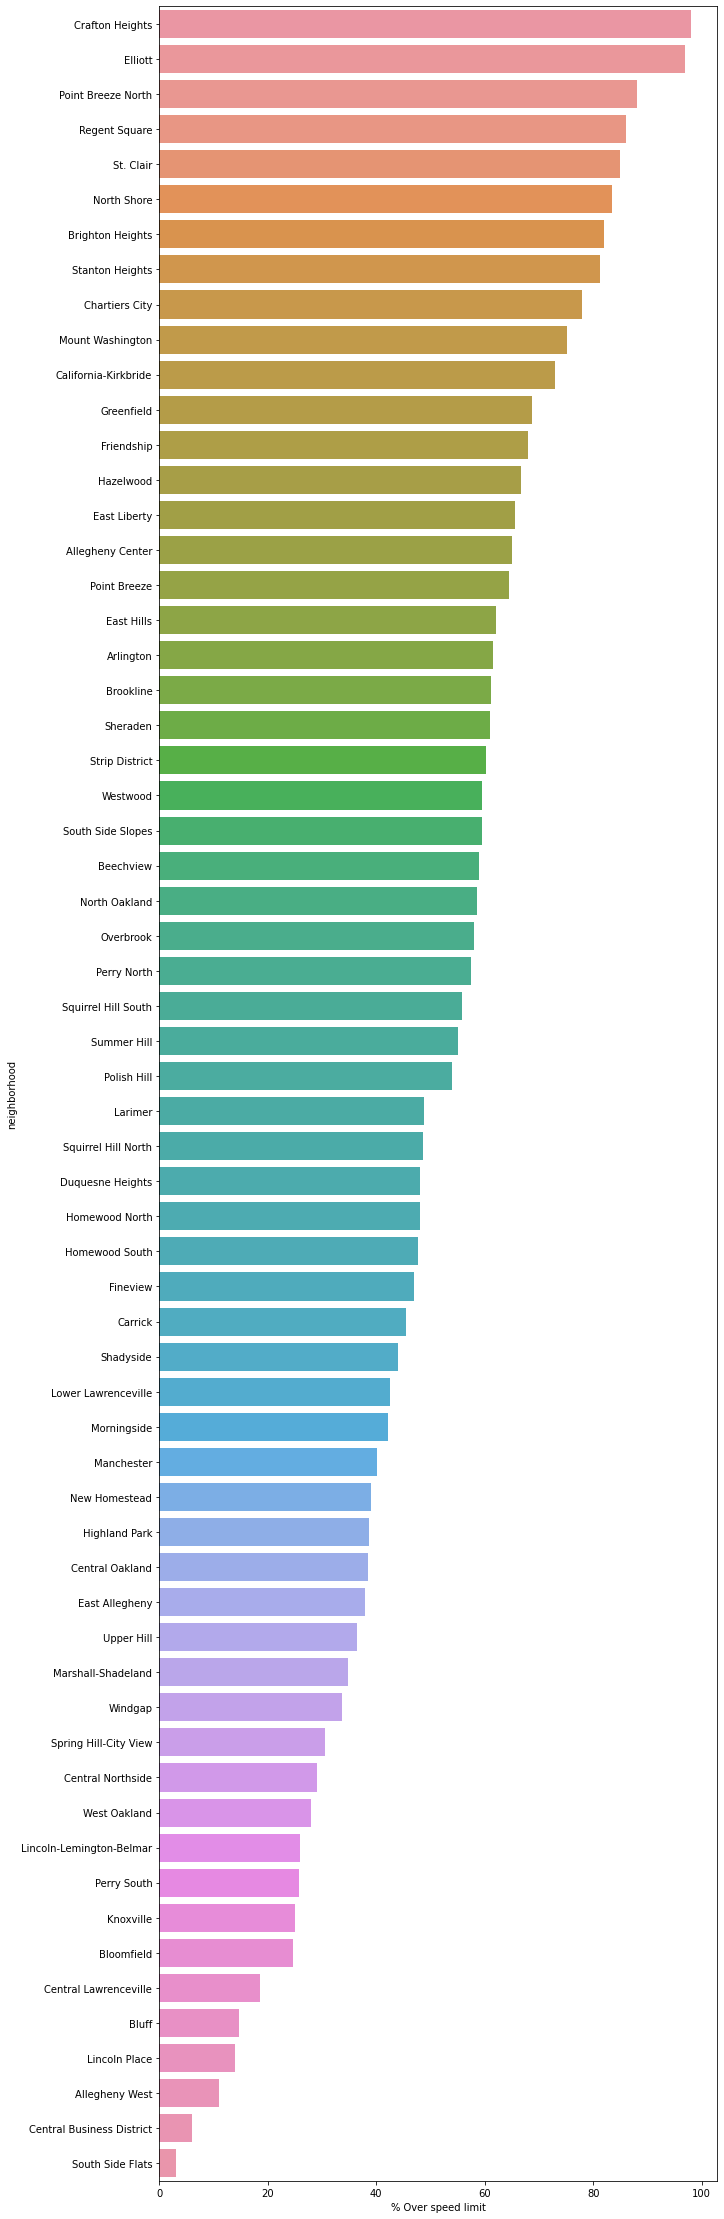

In [22]:
fig_dims = (10, 40)
fig, ax = plt.subplots(figsize=fig_dims)

ax = sb.barplot(x="% Over speed limit", # x axis label
                 y="neighborhood", # y axis label
                 ax=ax, # figsizes
                 data=hoods_averaged, # data we want to show
                 orient="h", # orientation of the graph
                 order=hoods_averaged.sort_values("% Over speed limit", ascending = False).neighborhood)

We now have a much better look at what our neighborhoods look like stacked up against one-another.<br>
We can see now that our top 10 safest neighborhoods are the following:

In [23]:
hoods_averaged = hoods_averaged.sort_values('% Over speed limit', ascending=False)
hoods_averaged.tail(10)

,neighborhood,% Over speed limit
315,Lincoln-Lemington-Belmar,26.00
123,Perry South,25.67
45,Knoxville,25.00
30,Bloomfield,24.56
43,Central Lawrenceville,18.50
13,Bluff,14.67
318,Lincoln Place,14.00
205,Allegheny West,11.00
114,Central Business District,6.00
310,South Side Flats,3.00


### Conclusion on Traffic Data
Based on the data provided by Pittsburgh's Department of Mobility & Infrastructure, the neighborhoods <br>
with (on average) the least amount of speeding vehicles are: <br>
- South Side Flats (1)
- Central Business District (2)
- Allegheny West (3)
- Lincoln Place (4)
- Bluff (5)
- Central Lawrenceville (6)
- Central Northside (7)
- Upper Hill (8)
- Bloomfield (9)
- Knoxville (10)

#### Important considerations about this data set
The data used in this analysis was collected between the years of 2017 and 2021.<br>
Its also important to note that only around 60 out of rougly 90 different neighborhoods had <br>
any traffic data recorded about them. The reason for this is unknown, so its important <br>
to note that this neighborhood list is not comprehensive for every single neighborhood in the city of Pittsburgh

# Final Conclusions

After looking at the results from all 3 of our metrics, we have concluded <br>
that Lincoln Place is the best neighborhood in Pittsburgh. This is because after looking <br>
at the results of all of our conclusions, Lincoln Place was consistently ranked somewhat safe by <br>
all of our metrics. <br>
<br>
By our arrests metric, it was ranked around 20th (out of 90 total) <br>
By our fires metric it was the same, ranked around 20th (out of 90 total)<br>
And by our final metric traffic, it was ranked at 4th safest. <br>
<br>
Therefore, we have conluded that the safest neighborhood in Pittburgh is Lincoln Place<br>
according to all of our metrics.
